/Users/tang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, units=128)`
/Users/tang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=10)`


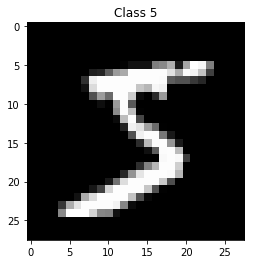

In [16]:
from matplotlib import pyplot as plt
% matplotlib inline

import numpy as np

np.random.seed(13)

from keras import backend as K
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Activation, Flatten, Dropout, Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.layers.normalization import BatchNormalization
import os
from keras.utils import plot_model
from keras.callbacks import EarlyStopping

num_classes = 10
input_unit_size = 28 * 28
np_epochs = 20

# 普通全连接 model
# dense
#   |
#   V
#  relu
#   |
#   V
#  dense
#   |
#   V
#  softmax
denseModel = Sequential()
denseModel.add(Dense(output_dim=128, input_dim=input_unit_size))
denseModel.add(Activation("relu"))
# model.add(Conv2D())
denseModel.add(Dense(output_dim=num_classes))
denseModel.add(Activation("softmax"))
denseModel.compile(loss='categorical_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])

currentPath = os.path.abspath('.')
(x_train, y_train), (x_test, y_test) = mnist.load_data(currentPath + "/data/mnist.npz")


plt.imshow(x_train[0], cmap='gray')
plt.title('Class ' + str(y_train[0]))


##归一化数据
x_train = x_train.reshape(x_train.shape[0], input_unit_size)
x_test = x_test.reshape(x_test.shape[0], input_unit_size)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 128)               100480    
_________________________________________________________________
activation_13 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1290      
_________________________________________________________________
activation_14 (Activation)   (None, 10)                0         
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


/Users/tang/anaconda3/lib/python3.6/site-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 51000 samples, validate on 9000 samples
Epoch 1/20


 - 3s - loss: 0.3160 - acc: 0.9130 - val_loss: 0.1696 - val_acc: 0.9512


Epoch 2/20


 - 2s - loss: 0.1454 - acc: 0.9586 - val_loss: 0.1145 - val_acc: 0.9676


Epoch 3/20


 - 2s - loss: 0.1010 - acc: 0.9708 - val_loss: 0.1084 - val_acc: 0.9687


Epoch 4/20


 - 2s - loss: 0.0766 - acc: 0.9783 - val_loss: 0.0875 - val_acc: 0.9750


Epoch 5/20


 - 2s - loss: 0.0597 - acc: 0.9830 - val_loss: 0.0779 - val_acc: 0.9766


Epoch 6/20


 - 2s - loss: 0.0480 - acc: 0.9861 - val_loss: 0.0850 - val_acc: 0.9750


Epoch 00006: early stopping


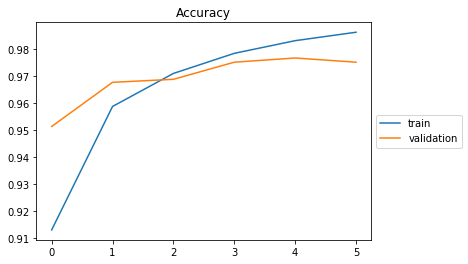

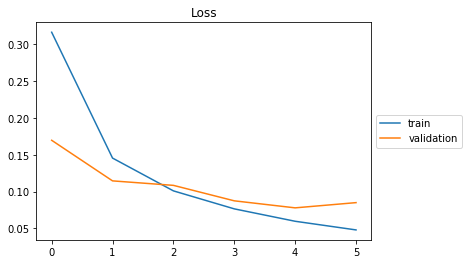

In [17]:
# one-hot representation
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

# 打印模型结构
denseModel.summary()

denseResult = denseModel.fit(x_train, y_train,
                             nb_epoch=np_epochs, batch_size=64,
                             verbose=2, validation_split=0.15,
                             callbacks=[
                                 EarlyStopping(monitor='val_loss',
                                               patience=1, verbose=2,
                                               mode='auto')])

plot_model(denseModel, "data/denseModel.png")
### dense model graph
x = range(len(denseResult.epoch))
plt.plot(x, denseResult.history['acc'], label='train')
plt.plot(x, denseResult.history['val_acc'], label='validation')
plt.title('Accuracy')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.plot(x, denseResult.history['loss'], label='train')
plt.plot(x, denseResult.history['val_loss'], label='validation')
plt.title('Loss')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


In [21]:
(x_train, y_train), (x_test, y_test) = mnist.load_data(currentPath + "/data/mnist.npz")

##归一化数据
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# one-hot representation
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
#### cnn model 
# 28*28*1->28*28*64->14*14*64->7*7*256--->512-->dropOut->10
# conv2D
#   |
#   V
#  pool
#   |
#   V
#  relu
#   |
#   V
#  Dense
#   |
#   V
#  softMax
cnnModel = Sequential()
cnnModel.add(Conv2D(64, (2, 2), input_shape=(28, 28, 1)))
cnnModel.add(Activation("relu"))
cnnModel.add(MaxPooling2D(pool_size=(2, 2)))

BatchNormalization(axis=-1)
cnnModel.add(Conv2D(128, (2, 2)))
cnnModel.add(Activation('relu'))
BatchNormalization(axis=-1)
cnnModel.add(Conv2D(256, (2, 2)))
cnnModel.add(Activation('relu'))
cnnModel.add(MaxPooling2D(pool_size=(2, 2)))

# fully layer
cnnModel.add(Flatten())

cnnModel.add(Dense(512))
# cnnModel.add(Dropout(0.1))
cnnModel.add(Activation('relu'))
BatchNormalization()
cnnModel.add(Dense(num_classes))
cnnModel.add(Activation("softmax"))
cnnModel.compile(loss='categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

# 打印模型结构
cnnModel.summary()

cnnResult = cnnModel.fit(x_train, y_train,
                         nb_epoch=np_epochs, batch_size=64,
                         verbose=2, validation_split=0.2)

plot_model(cnnModel, "data/cnnModel.png")

### cnn model graph

x = range(len(cnnResult.epoch))
plt.plot(x, cnnResult.history['acc'], label='train')
plt.plot(x, cnnResult.history['val_acc'], label='validation')
plt.title('Accuracy')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.plot(x, cnnResult.history['loss'], label='train')
plt.plot(x, cnnResult.history['val_loss'], label='validation')
plt.title('Loss')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 27, 27, 64)        320       
_________________________________________________________________
activation_30 (Activation)   (None, 27, 27, 64)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 12, 12, 128)       32896     
_________________________________________________________________
activation_31 (Activation)   (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 11, 11, 256)       131328    
_________________________________________________________________
activation_32 (Activation)   (None, 11, 11, 256)       0         
__________

/Users/tang/anaconda3/lib/python3.6/site-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 48000 samples, validate on 12000 samples
Epoch 1/20


 - 132s - loss: 0.1314 - acc: 0.9593 - val_loss: 0.0639 - val_acc: 0.9809


Epoch 2/20


 - 133s - loss: 0.0415 - acc: 0.9865 - val_loss: 0.0402 - val_acc: 0.9882


Epoch 3/20


 - 129s - loss: 0.0262 - acc: 0.9919 - val_loss: 0.0353 - val_acc: 0.9895


Epoch 4/20


 - 125s - loss: 0.0186 - acc: 0.9937 - val_loss: 0.0409 - val_acc: 0.9904


Epoch 5/20


 - 173s - loss: 0.0146 - acc: 0.9953 - val_loss: 0.0466 - val_acc: 0.9880


Epoch 6/20


 - 183s - loss: 0.0118 - acc: 0.9959 - val_loss: 0.0423 - val_acc: 0.9885


Epoch 7/20


 - 185s - loss: 0.0103 - acc: 0.9966 - val_loss: 0.0480 - val_acc: 0.9892


Epoch 8/20


 - 140s - loss: 0.0075 - acc: 0.9976 - val_loss: 0.0408 - val_acc: 0.9912


Epoch 9/20


 - 143s - loss: 0.0081 - acc: 0.9974 - val_loss: 0.0427 - val_acc: 0.9922


Epoch 10/20


 - 117s - loss: 0.0051 - acc: 0.9984 - val_loss: 0.0461 - val_acc: 0.9911


Epoch 11/20


 - 119s - loss: 0.0088 - acc: 0.9972 - val_loss: 0.0473 - val_acc: 0.9907


Epoch 12/20


 - 113s - loss: 0.0046 - acc: 0.9987 - val_loss: 0.0496 - val_acc: 0.9900


Epoch 13/20


 - 140s - loss: 0.0048 - acc: 0.9985 - val_loss: 0.0484 - val_acc: 0.9899


Epoch 14/20


 - 180s - loss: 0.0019 - acc: 0.9994 - val_loss: 0.0760 - val_acc: 0.9850


Epoch 15/20


 - 129s - loss: 0.0069 - acc: 0.9978 - val_loss: 0.0666 - val_acc: 0.9888


Epoch 16/20


 - 123s - loss: 0.0053 - acc: 0.9984 - val_loss: 0.0506 - val_acc: 0.9912


Epoch 17/20


 - 124s - loss: 0.0019 - acc: 0.9994 - val_loss: 0.0511 - val_acc: 0.9922


Epoch 18/20


 - 121s - loss: 0.0061 - acc: 0.9982 - val_loss: 0.0463 - val_acc: 0.9911


Epoch 19/20


 - 131s - loss: 0.0022 - acc: 0.9992 - val_loss: 0.0647 - val_acc: 0.9882


Epoch 20/20
